# Download Data

In [ ]:
import requests
import pandas as pd
from io import BytesIO

def download_csv(csv_url):
    response = requests.get(csv_url)
    response.raise_for_status()

    # Qui puoi modificare 'sep' o aggiungere altri parametri se necessario
    try:
        df = pd.read_csv(BytesIO(response.content), sep=',')
    except pd.errors.ParserError:
        df = pd.read_csv(BytesIO(response.content), sep=';', error_bad_lines=False)

    return df

In [ ]:
recipes_df = download_csv("https://github.com/GiovTemp/SustainaMeal_Case_Study/raw/main/data/final_recipes_set.csv")

In [ ]:
recipes_df

,title,sustainability_score,sustainability_label,Unnamed: 0,recipe_id,description,author_id,duration,directions,ingredients,...,protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,healthiness_label
0,Jack O Lantern 'o Fragrance,0.002409,0,495656,466123,I suppose that this isn't really a recipe as m...,169430,30.0,['When you cut the lid out of the pumpkin do ...,"['pumpkin liking', 'candle pumpkin', 'pumpkin ...",...,0.6,7,4,0.302381,0.250,0.25,NaN,NaN,NaN,0
1,Boiled Radishes,0.002502,0,294268,179840,These taste a lot like new potatoes. The boil...,254469,22.0,"['Trim ends and bad spots off Radishes.', 'Boi...","['radishes size bag bunch', 'water radishes']",...,0.8,2,2,0.293040,1.000,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['applesauce', 'garlic clove', 'ginger', 'mola...",0
2,Horseradish Applesauce,0.002590,0,364381,174389,"I'm not sure this even qualifies as a recipe, ...",226918,22.0,"['Blend applesauce and horseradish. ', 'Refrig...","['applesauce', 'horseradish']",...,0.3,2,2,0.313757,0.875,0.50,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['all - purpose flour', 'butter', 'butternut s...",0
3,Survival Necklace,0.002623,0,43445,95937,Fun for kids to make and a great way to keep t...,25792,10.0,['Other supplies: 18 inches string or yarn or ...,['Fruit Loops cereal cup apple jacks kind hole...,...,8.8,7,2,0.319215,0.750,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Old Bay Seasoning', 'Worcestershire sauce', ...",0
4,Apple Cider Reduction,0.002623,0,59722,521756,I saw a post about this on Facebook and gave i...,171084,155.0,"['In 6-8 quart stock pan, measure out 2 cups o...","['gallon apple cider fresh', 'gallon apple cid...",...,0.0,10,2,0.214286,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['bean sprouts', 'chicken thighs', 'fresh ging...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100865,Curried Lamb on Rice,0.951024,2,103145,373244,"With modification this recipe is from ""The Dia...",133174,65.0,"['Over medium heat, melt the butter in a large...","['lamb', 'medium onion', 'cloves', 'butter', '...",...,28.7,5,13,0.223549,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dijon mustard', 'Polish sausage', 'apricot p...",1
100866,Rich Lamb Curry,0.960504,2,442694,268247,The recipe isn't as time consuming as it looks...,491437,110.0,"['Heat 1 tbsp olive oil in dutch oven. ', 'Co...","['oil', 'lamb', 'flour', 'salt pepper', 'onion...",...,36.1,9,21,0.153328,0.000,0.00,NaN,NaN,NaN,1
100867,"Middle Eastern Slow-Cooked Stew With Lamb, Chi...",0.968458,2,359960,144850,From Cooking Light. Per 3/4 c. serving: 310 ca...,37779,112.0,['Let the oil get heating in a large pot over ...,"['oil', 'lamb', 'onions rings', 'water', 'clov...",...,20.8,12,19,0.205566,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['anchovies', 'celery ribs', 'diced tomatoes',...",1
100868,Five Meat Chili Con Carne With Beans,0.971454,2,37637,13568,yum,20571,210.0,"['In a large pot brown meat in stages, about a...","['beef', 'pork', 'lamb', 'sausage', 'sausage',...",...,14.5,7,15,0.197568,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"[""French\\'s French fried onions"", 'crabmeat',...",1


# Utils

In [ ]:
!pip install git+https://github.com/GiovTemp/SustainaMeal.git

  Cloning https://github.com/GiovTemp/SustainaMeal.git to /tmp/pip-req-build-8gzdv4yx
  Running command git clone --filter=blob:none --quiet https://github.com/GiovTemp/SustainaMeal.git /tmp/pip-req-build-8gzdv4yx
  Resolved https://github.com/GiovTemp/SustainaMeal.git to commit 13c4f421923712c8e19feac0ba3bbcab17f41a38
  Preparing metadata (setup.py) ... done
  Using cached collection-0.1.6.tar.gz (5.0 kB)
  Preparing metadata (setup.py) ... done
  Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Using cached langchain-0.1.5-py3-none-any.whl (806 kB)
  Using cached dataclasses_json-0.6.4-py3-none-any.whl (28 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
  Using cached langchain_community-0.0.17-py3-none-any.whl (1.6 MB)
  Using cached langchain_core-0.1.18-py3-none-any.whl (237 kB)
  Using cached langsmith-0.0.86-py3-none-any.whl (54 kB)
  Using cached marshmallow-3.20.2-py3-none-any.whl (49 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
  Creat

# SustainaMeal (ETA: 15/20 mins)

Initializes the system by loading the data and preparing the embeddings.

In [ ]:
from sustainameal import SustainaMeal

nutrients=['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
#nutrients = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

sm = SustainaMeal(
    recipes_df=recipes_df,
    nutrients=['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]'],
    transformer_name='davanstrien/autotrain-recipes-2451975973'
)

Processing Titles embeddings: 100%|██████████| 100870/100870 [16:22<00:00, 102.63batch/s]


# Experiments

In [ ]:
import pandas as pd
import ast
import json
from collections import Counter
# Supponiamo che recipes_df sia il tuo DataFrame originale con tutte le ricette

# Calcola la media di who_score
mean_who_score = recipes_df['who_score'].mean()

acceptable_tags = ['appetizers', 'main-dish', 'side-dishes', 'drinks', 'beverages', 'fruits', 'desserts',
                   'breakfast', 'pasta-rice-and-grains', 'rice', 'pasta', 'pizza', 'breads', 'meat', 'fish',
                   'seafood', 'beef', 'chicken', 'vegetarian']

def has_acceptable_tag(tags_str):
    try:
        # Converte la stringa in una lista
        tags = ast.literal_eval(tags_str)
    except (ValueError, SyntaxError):
        # Gestisce eventuali errori nella conversione
        tags = []
    # Controlla se almeno un tag è in acceptable_tags
    return any(tag in acceptable_tags for tag in tags)

# Inizializza un set vuoto per tenere traccia degli ID delle ricette già selezionati
selected_recipe_ids = set()

# Funzione per selezionare ricette uniche da un DataFrame
def select_unique_recipes(df, count=100):
    global selected_recipe_ids
    unique_df = df[~df['recipe_id'].isin(selected_recipe_ids)].sample(min(count, len(df)))
    selected_recipe_ids.update(unique_df['recipe_id'])
    return unique_df

# Filtra le ricette con un who_score superiore alla media e almeno un tag accettabile
high_who_score_recipes = select_unique_recipes(recipes_df[(recipes_df['who_score'] > mean_who_score) &
                                                          (recipes_df['tags'].apply(has_acceptable_tag))])

# Filtra le ricette con sustainability_label = 1 e almeno un tag accettabile
sustainability_label_1_recipes = select_unique_recipes(recipes_df[(recipes_df['sustainability_label'] == 1) &
                                                                  (recipes_df['tags'].apply(has_acceptable_tag))])

# Filtra le ricette con sustainability_label = 2 e almeno un tag accettabile
sustainability_label_2_recipes = select_unique_recipes(recipes_df[(recipes_df['sustainability_label'] == 2) &
                                                                  (recipes_df['tags'].apply(has_acceptable_tag))])

# Unisci le ricette selezionate
selected_recipes = pd.concat([high_who_score_recipes, sustainability_label_1_recipes, sustainability_label_2_recipes])


In [ ]:
high_who_score_recipes_file = './experiments/data/high_who_score_recipes.json'
sustainability_label_1_recipes_file = './experiments/data/sustainability_label_1_recipes.json'
sustainability_label_2_recipes_file = './experiments/data/sustainability_label_2_recipes.json'

# Read the JSON files into pandas DataFrames
high_who_score_recipes = pd.read_json(high_who_score_recipes_file)
sustainability_label_1_recipes = pd.read_json(sustainability_label_1_recipes_file)
sustainability_label_2_recipes = pd.read_json(sustainability_label_2_recipes_file)
selected_recipes = pd.concat([high_who_score_recipes, sustainability_label_1_recipes, sustainability_label_2_recipes])

In [ ]:
len(selected_recipes)

300

In [ ]:
nutrients_string = ", ".join(nutrients)
print(nutrients_string)


calories [cal], totalFat [g], sodium [mg], dietaryFiber [g], sugars [g], protein [g]


In [ ]:
results = []

In [ ]:
# Parametri per gli esperimenti
k_values = [1, 10, 50, 100]
match_all_tags_values = [True, False]

def convert_to_serializable(obj):
    """
    Converte oggetti in formati serializzabili in JSON.
    Gestisce DataFrame, array NumPy e altri tipi non serializzabili.
    """
    if hasattr(obj, 'to_dict'):
        # Converti il DataFrame pandas in un dizionario
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        # Converti l'array NumPy in una lista
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        # Tipi già serializzabili in JSON
        return obj
    else:
        # Converti altri tipi in stringa o implementa altre conversioni
        return str(obj)



for index, row in selected_recipes.iterrows():
    input_recipe = row['title']
    for k in k_values:
        for match_all_tags in match_all_tags_values:
            similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags, match_all_tags=match_all_tags)
            recipe_by_sustainameal_score = sm.order_recipe_by_sustainameal()

            result = {
                'recipe_name': input_recipe,
                'recipe_id': row['recipe_id'],
                'sustnability_score': 1-row['sustainability_score'],
                'sustnability_label': row['sustainability_label'],
                'who_score': row['who_score'],
                'healthiness_label': row['healthiness_label'],
                'k': k,
                'nutrients' : nutrients_string,
                'match_all_tags': match_all_tags,
                'similar_recipes': convert_to_serializable(similar_recipes),
                'ordered_by_sustainameal': convert_to_serializable(recipe_by_sustainameal_score[:10])
            }
            results.append(result)



Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.50batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.22batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.92batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.77batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.28batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.13batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.26batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.55batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.51batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 85.90batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.06batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.21batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.59batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.15batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 84.89batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.34batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.95batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.78batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.51batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.85batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.63batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.49batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.32batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.52batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.20batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.33batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.41batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.65batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.40batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.41batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.36batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.05batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.29batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.76batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.33batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.61batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.81batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.05batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.92batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.58batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.65batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.03batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.13batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.60batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.98batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.91batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.89batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.50batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.74batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 298


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.88batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 11481


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.19batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 298


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.61batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 11481


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.96batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 298


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.88batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 11481


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 91.29batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 298


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.39batch/s]


Tags to match: ['beverages', 'breakfast']
Number of filtered recipes: 11481


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.60batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 85.57batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.51batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.79batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.92batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.93batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.21batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.23batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.34batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.61batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.38batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.67batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.32batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.76batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.67batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.69batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.14batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.95batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.96batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.12batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.80batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.43batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.75batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.35batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.39batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 91.03batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.43batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.87batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.05batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.54batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.00batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.45batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.67batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.74batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.88batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.31batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.71batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.89batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.07batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.83batch/s]


Tags to match: ['rice', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.57batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.74batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.25batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.24batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.45batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.20batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.05batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.19batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.28batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.69batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.98batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.98batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.17batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.21batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.77batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.38batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.57batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.58batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.31batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.26batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.63batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.31batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.25batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.28batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.00batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.10batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.75batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.62batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.06batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.46batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.85batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.98batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.23batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.67batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.46batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.31batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.32batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.37batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.99batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.76batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.16batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 92.31batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.81batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.91batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.71batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.20batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.85batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 83.87batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.81batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.96batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.90batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.42batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.93batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.60batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.65batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.67batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.42batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.54batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.70batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.96batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.89batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.05batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.78batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.37batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.80batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.26batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.49batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.10batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.00batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.95batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.18batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.41batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.02batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.15batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.41batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 32166


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.66batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.14batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 32166


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.71batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.10batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 32166


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.04batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.66batch/s]


Tags to match: ['breads', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 32166


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.97batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.88batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.74batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.55batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.12batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.44batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.73batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.46batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.52batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.38batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.13batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.14batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.17batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.73batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.78batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.41batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.99batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.58batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.82batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.53batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 82.13batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.42batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.18batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.10batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.15batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.04batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.76batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.95batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.50batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.12batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.94batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.66batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.69batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.18batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.23batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.30batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.68batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.70batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.03batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.32batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.78batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.20batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.96batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.35batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.00batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.09batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.79batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.74batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.35batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.45batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.82batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.46batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.91batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.75batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.92batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.29batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.16batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.12batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.81batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.50batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.81batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.77batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.76batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.38batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.95batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.40batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.71batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.99batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.97batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.14batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.29batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 1586


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.91batch/s]


Tags to match: ['appetizers', 'vegetarian']
Number of filtered recipes: 22081


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.33batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.76batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.47batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.14batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.61batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.96batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.71batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.34batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.23batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 894


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.13batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.10batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 894


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.13batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.27batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 894


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.36batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.32batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 894


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.55batch/s]


Tags to match: ['appetizers', 'seafood', 'fish']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.59batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 1441


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.81batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 21925


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.29batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 1441


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.08batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 21925


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.90batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 1441


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.56batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 21925


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.54batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 1441


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.25batch/s]


Tags to match: ['breakfast', 'vegetarian']
Number of filtered recipes: 21925


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.26batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.79batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.58batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.77batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.15batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.44batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.68batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.27batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.01batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.73batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.06batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.81batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.70batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.02batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.15batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.06batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.47batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.31batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.79batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.25batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.01batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.27batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.59batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.90batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.18batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 1671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.64batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 38245


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.82batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 1671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.66batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 38245


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.94batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 1671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.06batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 38245


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.94batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 1671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.64batch/s]


Tags to match: ['main-dish', 'side-dishes']
Number of filtered recipes: 38245


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.24batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.84batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.11batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.46batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.20batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.27batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.52batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.36batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.15batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.13batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.04batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.66batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.51batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.63batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.35batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.60batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.53batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.53batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.91batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.22batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.05batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.27batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.22batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.21batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.57batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.13batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.87batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.79batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.51batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.91batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.25batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.18batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.39batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.15batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.07batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.18batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.72batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.27batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.95batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.35batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.75batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 80.00batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.84batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.15batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.77batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.27batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.66batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.98batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.03batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.76batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.31batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.30batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.94batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.46batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.34batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.87batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.16batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.16batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.81batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.26batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.29batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.90batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.82batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.11batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.54batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 765


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.42batch/s]


Tags to match: ['main-dish', 'pasta', 'seafood', 'fish', 'pasta-rice-and-grains']
Number of filtered recipes: 34606


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.77batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.41batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.21batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.79batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.00batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.25batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.94batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.25batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.99batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.92batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.17batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.74batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.66batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.43batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.50batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.56batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.95batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.72batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.23batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.04batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.00batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.10batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.54batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.08batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.11batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.42batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.97batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.13batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.26batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.21batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.39batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.18batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.87batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.23batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.58batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.08batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.50batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.29batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.39batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.84batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.31batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.93batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.02batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.53batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.28batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.31batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.30batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.79batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.62batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 1001


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.05batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 17911


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.80batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 1001


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.60batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 17911


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.98batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 1001


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.15batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 17911


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.74batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 1001


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.97batch/s]


Tags to match: ['pasta', 'seafood', 'pasta-rice-and-grains']
Number of filtered recipes: 17911


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.31batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.36batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.79batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.68batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.56batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.36batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.63batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.67batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.59batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 49


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.55batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 25257


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.27batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 49


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.03batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 25257


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.61batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 49


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.85batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 25257


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.00batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 49


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.72batch/s]


Tags to match: ['breakfast', 'beef', 'meat']
Number of filtered recipes: 25257


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.97batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.23batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.32batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.63batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.64batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.49batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.03batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.41batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.15batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.51batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.29batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.21batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.01batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.84batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.19batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.98batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.18batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.03batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.04batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.98batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.89batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.47batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.22batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.72batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.48batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.50batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.09batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.52batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.33batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.70batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.82batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.92batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.17batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.43batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.31batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.85batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.20batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.43batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.70batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.47batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.74batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.50batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.43batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.65batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.50batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.20batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.10batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.95batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.94batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.98batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.07batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.53batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.30batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.22batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 998


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.90batch/s]


Tags to match: ['desserts', 'pasta-rice-and-grains']
Number of filtered recipes: 35577


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.20batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.18batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.69batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.82batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.04batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.66batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.42batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.46batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.57batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.55batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.23batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.40batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.22batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.78batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.88batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.77batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.66batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.39batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.82batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.50batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.55batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.15batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.65batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.56batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.31batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1135


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.32batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.60batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1135


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.39batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.23batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1135


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.49batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.87batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1135


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.00batch/s]


Tags to match: ['pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.70batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.17batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.18batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.59batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.42batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.09batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.01batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.51batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.28batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.85batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.68batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.18batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.85batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.39batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.77batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.30batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.61batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.46batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.40batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.84batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.88batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.04batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.43batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.40batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.98batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.57batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.41batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.51batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.46batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.71batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.57batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.74batch/s]


Tags to match: ['meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.01batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.69batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.94batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.50batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.63batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.89batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.13batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.54batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.66batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.27batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.69batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.97batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.52batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.86batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.33batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.85batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.18batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.61batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.84batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.84batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.89batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.34batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.76batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.23batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.92batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.02batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.48batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.51batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.85batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.00batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.34batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.35batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.13batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.48batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.01batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.45batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 36.36batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.75batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.66batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.27batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.75batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.53batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.64batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.13batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.60batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.27batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.82batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.23batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.54batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.99batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.11batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.31batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.08batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.88batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.15batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.98batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.61batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.19batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.46batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.86batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.88batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.41batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.69batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.39batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.03batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.03batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.34batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.44batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.83batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.75batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.33batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.69batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.16batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.33batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.52batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.47batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.15batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.21batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.65batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.97batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.13batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.42batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.12batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.70batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.48batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.53batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.30batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.98batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.31batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.23batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.17batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.06batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.52batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.37batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.71batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.86batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.89batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.26batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.31batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.80batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.55batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.63batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.66batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.61batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.99batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.77batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.68batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.29batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.16batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.55batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.05batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.96batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.78batch/s]


Tags to match: ['main-dish', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.06batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.25batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.07batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.29batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.37batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.67batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.41batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.17batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.11batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.78batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.55batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.95batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.74batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.95batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.83batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.08batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.74batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.10batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.09batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.90batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.77batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.84batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.04batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.02batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.17batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.26batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.59batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.57batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.90batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.74batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.69batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.43batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.84batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.20batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.87batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.55batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 235


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.82batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.43batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.94batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.22batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.68batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.39batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.50batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.92batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.30batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.36batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.29batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.43batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.39batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.08batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.29batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.75batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.27batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.56batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.23batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.66batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.16batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.32batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.74batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.17batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.99batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.36batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.53batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.94batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.38batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.28batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.58batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.77batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.21batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.07batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.86batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.03batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.92batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.64batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.58batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.39batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.24batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.63batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.14batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.52batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.27batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.39batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.47batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.15batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.40batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.86batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.69batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.16batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.23batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.74batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.76batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.57batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.94batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.23batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.92batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.92batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.79batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.56batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.68batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.79batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.17batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.11batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.38batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.41batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.93batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.43batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.80batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.32batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.61batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.37batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.87batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.39batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.35batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.93batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.90batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.03batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.86batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.67batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.81batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.97batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.55batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.61batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.69batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.76batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.06batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.09batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.76batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.17batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.77batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.72batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.36batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.36batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.72batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.56batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.25batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.55batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.48batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.87batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.02batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.21batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.02batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.76batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.66batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.35batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.98batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.73batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.24batch/s]


Tags to match: ['seafood']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.04batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.71batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.18batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.78batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.61batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.43batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.41batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 912


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.87batch/s]


Tags to match: ['beverages', 'vegetarian']
Number of filtered recipes: 19655


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.69batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.26batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.81batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.84batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.68batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.02batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.34batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.31batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.83batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.85batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.93batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.54batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.00batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.99batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.92batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.57batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.70batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.88batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.01batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.34batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.80batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.69batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.46batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.36batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 44


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.28batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 35697


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.96batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 44


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.69batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 35697


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.14batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 44


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.69batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 35697


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.05batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 44


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.19batch/s]


Tags to match: ['breads', 'breakfast', 'desserts']
Number of filtered recipes: 35697


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.86batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.64batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.22batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.35batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.37batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.77batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.92batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.97batch/s]


Tags to match: ['main-dish', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.46batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.30batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.53batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.92batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.66batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.87batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.47batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.24batch/s]


Tags to match: ['side-dishes', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.86batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.04batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.85batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.60batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.41batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.20batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.86batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.64batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.62batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.37batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.71batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.96batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.01batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.25batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.90batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.83batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.12batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 228


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.53batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.41batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 228


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.03batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.23batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 228


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.90batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.48batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 228


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.50batch/s]


Tags to match: ['appetizers', 'main-dish', 'seafood', 'fish']
Number of filtered recipes: 34669


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.45batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.26batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.03batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.50batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.70batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.54batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.70batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.94batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.65batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.34batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.51batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.51batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.22batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.73batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.52batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.77batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.15batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.25batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.61batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.59batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.78batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.79batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.17batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.73batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.33batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.92batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.72batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.58batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.03batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.17batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.76batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.22batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.46batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.59batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.69batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.16batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.89batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.95batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.13batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.07batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.13batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.94batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.97batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.92batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.26batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.12batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.63batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.72batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.42batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.48batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.37batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.53batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.35batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.92batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.64batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.96batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.13batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.10batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.18batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.94batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.55batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.97batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.38batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 1329


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.44batch/s]


Tags to match: ['main-dish', 'pasta', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 43799


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.39batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.50batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.54batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.74batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.25batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.31batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.87batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.43batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.69batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.67batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.13batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.84batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.21batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.36batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.04batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.78batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.78batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.97batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.35batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.83batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.86batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.44batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.57batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.71batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.88batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.64batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.33batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.31batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.67batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.73batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.59batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.72batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.55batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.97batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.59batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.45batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 86.67batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.88batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.28batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 2773


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.34batch/s]


Tags to match: ['side-dishes', 'rice', 'pasta-rice-and-grains']
Number of filtered recipes: 23918


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.22batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 105


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.33batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 44690


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.46batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 105


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.61batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 44690


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.19batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 105


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.01batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 44690


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.38batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 105


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.96batch/s]


Tags to match: ['breakfast', 'main-dish', 'vegetarian']
Number of filtered recipes: 44690


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.41batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.01batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.86batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.39batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.59batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.45batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.33batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.12batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.31batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.77batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.87batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.02batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.16batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.32batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.22batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.62batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.00batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.61batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 33.59batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.84batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.60batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.68batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.40batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.39batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.89batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.94batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.20batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.99batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.63batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.24batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.19batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.78batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.33batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.60batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.10batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.15batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.77batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.10batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.84batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.02batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.22batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.54batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.85batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.02batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.44batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.34batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.05batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.69batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.52batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.82batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.57batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.55batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.27batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.13batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.82batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.54batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.87batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.83batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.26batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.21batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.93batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.28batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.54batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.53batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.43batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.93batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.12batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.51batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.97batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.97batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.57batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.86batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.88batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.81batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.55batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.08batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.10batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.49batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 834


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.71batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 19999


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.12batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 834


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.15batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 19999


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.85batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 834


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.47batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 19999


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.45batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 834


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.43batch/s]


Tags to match: ['breads', 'pasta-rice-and-grains']
Number of filtered recipes: 19999


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.65batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.39batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.09batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.44batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.41batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.17batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.44batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.31batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.80batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.64batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.62batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.61batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.01batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.94batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.61batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 973


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.06batch/s]


Tags to match: ['main-dish', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.16batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 37


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.87batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.71batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 37


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.48batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.25batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 37


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.63batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.02batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 37


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.21batch/s]


Tags to match: ['main-dish', 'side-dishes', 'pasta', 'chicken', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.91batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.06batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.87batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.20batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.72batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.27batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.11batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.66batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.55batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.96batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.54batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.40batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.85batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.09batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.88batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.70batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.57batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.30batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.01batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.98batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.58batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.20batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.43batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.09batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 3946


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.46batch/s]


Tags to match: ['side-dishes', 'vegetarian']
Number of filtered recipes: 25571


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.57batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.37batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.68batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.14batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.34batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.83batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.05batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.42batch/s]


Tags to match: ['beverages']
Number of filtered recipes: 4490


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.46batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.41batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.43batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.69batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.79batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.93batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.50batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.70batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.39batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.17batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.59batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.46batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.22batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.60batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.15batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.68batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.54batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.77batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.80batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.16batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.73batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.18batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.74batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.93batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.52batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.93batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.23batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.70batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.23batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.49batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.60batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 38.55batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.14batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.77batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.60batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.22batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.33batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.82batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.98batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.35batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 47769


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.36batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.38batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 47769


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.06batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.74batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 47769


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.78batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 671


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.78batch/s]


Tags to match: ['main-dish', 'side-dishes', 'vegetarian']
Number of filtered recipes: 47769


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.15batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.45batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.37batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.79batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.55batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.47batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.67batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 777


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.29batch/s]


Tags to match: ['appetizers', 'side-dishes']
Number of filtered recipes: 20253


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.92batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.98batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.62batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.56batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.90batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.67batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.52batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5428


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.11batch/s]


Tags to match: ['seafood', 'fish']
Number of filtered recipes: 5660


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.68batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.84batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.97batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.62batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.28batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.58batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.12batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.77batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.02batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.91batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.94batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.78batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.57batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.10batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.14batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.06batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.40batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.00batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.21batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.89batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.48batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.86batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.75batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.49batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.63batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.97batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.42batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.32batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.27batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.47batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.99batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.26batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.23batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.17batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.82batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.18batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.70batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.21batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.09batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.24batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.87batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.93batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.11batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.60batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.25batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.94batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.05batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.16batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.96batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.28batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.10batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.22batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.56batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.70batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.97batch/s]


Tags to match: ['vegetarian']
Number of filtered recipes: 16077


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.19batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.51batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.80batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.79batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.10batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.66batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.90batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13251


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.37batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 13252


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.39batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.09batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.27batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.45batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.78batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.35batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.99batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3278


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.37batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 39275


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.79batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 330


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.90batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 46087


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.33batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 330


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.58batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 46087


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.62batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 330


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.89batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 46087


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.00batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 330


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.56batch/s]


Tags to match: ['desserts', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 46087


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.35batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.10batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.30batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.35batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.40batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.86batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.88batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.29batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 6837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.58batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.10batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 6837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.36batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.39batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 6837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.23batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.85batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 6837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.87batch/s]


Tags to match: ['chicken', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.73batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 262


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.26batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 27185


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.30batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 262


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.81batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 27185


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.44batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 262


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.42batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 27185


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.07batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 262


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.26batch/s]


Tags to match: ['breads', 'breakfast', 'vegetarian']
Number of filtered recipes: 27185


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.87batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.54batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.85batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.66batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.57batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.07batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.13batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.20batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.39batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.87batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.86batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.41batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.98batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.38batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.40batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.60batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.52batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.65batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.62batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.48batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.96batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.56batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.11batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.74batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.19batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.28batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.03batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.30batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.52batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.68batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.07batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.71batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.22batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.22batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.99batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.59batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.85batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.88batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.97batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.25batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.59batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 26


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.70batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 29625


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 36.71batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 26


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.07batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 29625


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.01batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 26


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.74batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 29625


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.79batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 26


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.10batch/s]


Tags to match: ['appetizers', 'seafood', 'meat']
Number of filtered recipes: 29625


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.98batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.92batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.85batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.14batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.17batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.24batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.34batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.32batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.51batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.80batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.03batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.50batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.06batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.02batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.27batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.89batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.91batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.41batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.08batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.28batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.38batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.76batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.86batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.36batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.18batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 902


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.35batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 19638


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.18batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 902


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.23batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 19638


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.60batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 902


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.78batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 19638


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.99batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 902


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.35batch/s]


Tags to match: ['breakfast', 'pasta-rice-and-grains']
Number of filtered recipes: 19638


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.21batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.91batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.38batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.16batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.13batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.27batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.86batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.91batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 13440


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.37batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.20batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.32batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.68batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.48batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.51batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.68batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.76batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.41batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 110


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.07batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.09batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 110


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.66batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.02batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 110


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.89batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 110


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.56batch/s]


Tags to match: ['main-dish', 'side-dishes', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 46366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.01batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.10batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.86batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.06batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.22batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.65batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.60batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.93batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.97batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.99batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.21batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.78batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.05batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.02batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.81batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 931


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.56batch/s]


Tags to match: ['appetizers', 'seafood']
Number of filtered recipes: 12319


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.11batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.92batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.96batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.12batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.20batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.83batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.56batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.12batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.91batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.04batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.35batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.83batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.79batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.66batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.40batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.39batch/s]


Tags to match: ['main-dish', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.36batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.25batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.28batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.76batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.40batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.28batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.75batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.63batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.21batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.40batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.50batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.93batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.07batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.19batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.68batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.08batch/s]


Tags to match: ['appetizers']
Number of filtered recipes: 7590


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.05batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.02batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.29batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.64batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.46batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.20batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.18batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.83batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.73batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.19batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.81batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.31batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.93batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.03batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.52batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.51batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.43batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.43batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.79batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.49batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.48batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.44batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.40batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 2816


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.66batch/s]


Tags to match: ['desserts', 'vegetarian']
Number of filtered recipes: 36585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.48batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.46batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.26batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.38batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.57batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.63batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.06batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.65batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.48batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.24batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.80batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.31batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.37batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.59batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.82batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 837


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.99batch/s]


Tags to match: ['side-dishes', 'rice', 'vegetarian', 'pasta-rice-and-grains']
Number of filtered recipes: 33805


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.74batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.80batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.70batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.93batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.04batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.92batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.72batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.02batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 23324


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.91batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.22batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.83batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.21batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.24batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.80batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.62batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.92batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.15batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.78batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.44batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.96batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.27batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.92batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.78batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.55batch/s]


Tags to match: ['breads']
Number of filtered recipes: 7582


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.09batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.30batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.02batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.25batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.95batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.22batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.46batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.89batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.93batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.58batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.89batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.97batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.45batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.62batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.20batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.28batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.17batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.56batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.92batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.90batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.80batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.58batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.70batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 2585


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.61batch/s]


Tags to match: ['main-dish', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.19batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.01batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.47batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.23batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.13batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.55batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.97batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.82batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.57batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.12batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.60batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.14batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.32batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.68batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.31batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.09batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.71batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.85batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.31batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.91batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.61batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.39batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.33batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.97batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.39batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.60batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.20batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.08batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.05batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.17batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.41batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.74batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.08batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.14batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.13batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.79batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.73batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.39batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.76batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.40batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 32751


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.77batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.62batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 32751


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.68batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.89batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 32751


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.44batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.16batch/s]


Tags to match: ['main-dish', 'pasta-rice-and-grains']
Number of filtered recipes: 32751


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.91batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.60batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.94batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.69batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.62batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.72batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.23batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.91batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.70batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 3466


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.72batch/s]


Tags to match: ['main-dish', 'seafood', 'fish']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.51batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.63batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.16batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.35batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.88batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.64batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.66batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.55batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.26batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.88batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.80batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.60batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.26batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.23batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.39batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.80batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.09batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.28batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.14batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.62batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.38batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.72batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.23batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.61batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.44batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.14batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.79batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.05batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.50batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.79batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.94batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.92batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.68batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.87batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.64batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.35batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.86batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.36batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.65batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.37batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.85batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.58batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.34batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.75batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.78batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.04batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.99batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.86batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.50batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.76batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.93batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.61batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.78batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.12batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.91batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.32batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.37batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.59batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.10batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.22batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.22batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.39batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.03batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.41batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.99batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.32batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.86batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.92batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.88batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.82batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.60batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.73batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.63batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.79batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.98batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.20batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.70batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.17batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.63batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 28.37batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.50batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.74batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.78batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.79batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.76batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.17batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.79batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.65batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.39batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.60batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.25batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.71batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.46batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.28batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.20batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.07batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.57batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.23batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.85batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.70batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.73batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.94batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.24batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.98batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.20batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.41batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.83batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.52batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.70batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.97batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.77batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.05batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.40batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.16batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.48batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.42batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.10batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.97batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.10batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.48batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.60batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 35.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.59batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.98batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.97batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.89batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.39batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.33batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.86batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.27batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.93batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.98batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.11batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.26batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.59batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.32batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.22batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.62batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.36batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.41batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.61batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.99batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.83batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.49batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 74.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.97batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.69batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.26batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.05batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.60batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.48batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.72batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.88batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.15batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.54batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.73batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.78batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 42


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.55batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 33307


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.81batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 42


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.88batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 33307


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.54batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 42


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.87batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 33307


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.12batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 42


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.04batch/s]


Tags to match: ['appetizers', 'main-dish', 'pizza']
Number of filtered recipes: 33307


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.95batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.71batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.10batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.97batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.11batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.81batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.89batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.49batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.54batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.39batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.61batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.69batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.11batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.80batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.76batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.07batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.18batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.24batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.43batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.02batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.62batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.76batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.23batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.72batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.39batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.29batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.80batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.84batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.19batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.14batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.34batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.76batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.11batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.41batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.40batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.10batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.11batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.59batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.57batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.23batch/s]


Tags to match: ['breakfast']
Number of filtered recipes: 7289


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.68batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.52batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.55batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.99batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.10batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.05batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 5


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.46batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34619


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.64batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 5


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.60batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34619


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.80batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 5


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.97batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34619


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.23batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 5


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.94batch/s]


Tags to match: ['breakfast', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 34619


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.59batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.16batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.49batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.50batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.73batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.81batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.57batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.28batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.69batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.68batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.36batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.95batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.71batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.01batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.08batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.81batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.79batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.53batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.98batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.14batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.97batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.42batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.55batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.14batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.98batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 40.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.61batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.37batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.49batch/s]


Tags to match: ['main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.68batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.48batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.00batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.07batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.19batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.02batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.28batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.41batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 5426


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.84batch/s]


Tags to match: ['main-dish', 'chicken', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.91batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.67batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.80batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.24batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.98batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.51batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.60batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.29batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.02batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.72batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.84batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.97batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.38batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.01batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.51batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.40batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.20batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.98batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.07batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.78batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.05batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.93batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.39batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.12batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.52batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.06batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.04batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.46batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.09batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.50batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.88batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.53batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.13batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.69batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.94batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.16batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.13batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 26476


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.08batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.60batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.40batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.19batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.50batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.72batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.79batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.12batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.07batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 5791


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.10batch/s]


Tags to match: ['beef', 'meat']
Number of filtered recipes: 18552


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.73batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.42batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.04batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.06batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.22batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.36batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.04batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.86batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.66batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.95batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 286


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.69batch/s]


Tags to match: ['appetizers', 'beef', 'meat']
Number of filtered recipes: 25070


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.87batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1
No alternative found.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.60batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 48155


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.07batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1
No alternative found.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.64batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 48155


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.39batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1
No alternative found.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.80batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 48155


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.60batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 1
No alternative found.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.40batch/s]


Tags to match: ['appetizers', 'breakfast', 'main-dish', 'beef', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 48155


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.44batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.82batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.02batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.45batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.06batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.50batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.28batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 6976


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.37batch/s]


Tags to match: ['main-dish', 'pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 32752


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.56batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.88batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 44.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.03batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.20batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.22batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.40batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.69batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.47batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.19batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.88batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.41batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.29batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.58batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.72batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.88batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.31batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.89batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.20batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.52batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.80batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.27batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.48batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.90batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.86batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.87batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.89batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.84batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.46batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.71batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 60


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.42batch/s]


Tags to match: ['main-dish', 'side-dishes', 'beef', 'meat']
Number of filtered recipes: 42452


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.98batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.58batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.52batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.59batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 38.50batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.88batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.32batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.46batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.17batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.65batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.93batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.69batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.77batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.77batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.88batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3602


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.30batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 28534


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.53batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.00batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.63batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.50batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.51batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.69batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.15batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.14batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.68batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 96


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.67batch/s]


Tags to match: ['appetizers', 'main-dish', 'beef', 'meat']
Number of filtered recipes: 37106


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.22batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.51batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.95batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.79batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 50.02batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.76batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.43batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.33batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.75batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 114


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.29batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 31341


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.60batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 114


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.08batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 31341


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.74batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 114


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.33batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 31341


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.71batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 114


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.70batch/s]


Tags to match: ['side-dishes', 'beef', 'meat']
Number of filtered recipes: 31341


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.46batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.90batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.09batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.33batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 39.37batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.48batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.46batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.57batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.58batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.05batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.71batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.74batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 42.03batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.86batch/s]


Tags to match: ['main-dish', 'beef', 'rice', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36921


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.55batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 986


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.15batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.71batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 986


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.43batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.30batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 986


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.97batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.03batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 986


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.55batch/s]


Tags to match: ['beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 28790


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.94batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.20batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.32batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.22batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.04batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.33batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.91batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.31batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.71batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.83batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.76batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.95batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.02batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.80batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.36batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.99batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 45.27batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.93batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.43batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.89batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.70batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.65batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.44batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.79batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.67batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.66batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.06batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.34batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.45batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.86batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.17batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.13batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.92batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.24batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.10batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.96batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.26batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.51batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.94batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.28batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.30batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.18batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 43.15batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.63batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 46.21batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.79batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.93batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.74batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.19batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.08batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 886


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.29batch/s]


Tags to match: ['main-dish', 'beef', 'pasta', 'meat', 'pasta-rice-and-grains']
Number of filtered recipes: 36922


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.74batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.05batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.77batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.14batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.23batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.25batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.54batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.81batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.55batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.69batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.91batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.72batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.48batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.38batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.76batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13953


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.59batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.64batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.01batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.87batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.62batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.31batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.84batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.61batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 49.21batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.48batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.75batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 57.82batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.81batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.78batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 4686


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.80batch/s]


Tags to match: ['main-dish', 'beef', 'meat']
Number of filtered recipes: 31075


In [ ]:
len(results)

4800

In [ ]:
with open('experiment_results.json', 'w') as file:
    json.dump(results, file)


In [ ]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Assumiamo di avere gli ID delle ricette per ogni sottogruppo
high_who_score_ids = high_who_score_recipes['recipe_id'].unique()
sustainability_label_1_ids = sustainability_label_1_recipes['recipe_id'].unique()
sustainability_label_2_ids = sustainability_label_2_recipes['recipe_id'].unique()

# Assumiamo che le variabili high_who_score_recipes, sustainability_label_1_recipes e sustainability_label_2_recipes
# contengano gli ID delle ricette per ciascun sottogruppo.

# Estrarre gli incrementi dalle liste di dizionari nella colonna 'ordered_by_sustainameal'
def estrai_incrementi(ordered_list, key):
    # Estrai il valore dell'incremento da ciascun dizionario nella lista
    return [d[key] for d in ordered_list if key in d]

# Aggiungere colonne di incremento al DataFrame
experiment_df['healthiness_increment'] = experiment_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'healthiness_increment'))
experiment_df['sustainability_increment'] = experiment_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainability_increment'))
experiment_df['sustainameal_score_increment'] = experiment_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainameal_score_increment'))

# Calcolare la media degli incrementi
experiment_df['healthiness_increment_mean'] = experiment_df['healthiness_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
experiment_df['sustainability_increment_mean'] = experiment_df['sustainability_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
experiment_df['sustainameal_score_increment_mean'] = experiment_df['sustainameal_score_increment'].apply(lambda x: sum(x) / len(x) if x else 0)

# Ora possiamo utilizzare queste nuove colonne per calcolare le medie sottogruppo
def calcola_medie_sottogruppo(subgroup_df):
    # Calcola le medie degli incrementi per il sottogruppo dato
    return subgroup_df.groupby(['k', 'nutrients', 'match_all_tags']).agg({
        'healthiness_increment_mean': 'mean',
        'sustainability_increment_mean': 'mean',
        'sustainameal_score_increment_mean': 'mean'
    }).reset_index()

# Filtra il DataFrame sperimentale in base agli ID delle ricette per ottenere i sottogruppi
high_who_score_df = experiment_df[experiment_df['recipe_id'].isin(high_who_score_ids)]
sustainability_label_1_df = experiment_df[experiment_df['recipe_id'].isin(sustainability_label_1_ids)]
sustainability_label_2_df = experiment_df[experiment_df['recipe_id'].isin(sustainability_label_2_ids)]

# Calcolare le medie per ogni sottogruppo
medie_high_who_score = calcola_medie_sottogruppo(high_who_score_df)
medie_sustainability_label_1 = calcola_medie_sottogruppo(sustainability_label_1_df)
medie_sustainability_label_2 = calcola_medie_sottogruppo(sustainability_label_2_df)

# Visualizzare le medie per ogni sottogruppo
print("Medie High WHO Score:")
print(medie_high_who_score)
print("\nMedie Sustainability Label 1:")
print(medie_sustainability_label_1)
print("\nMedie Sustainability Label 2:")
print(medie_sustainability_label_2)




Medie High WHO Score:
      k                                          nutrients  match_all_tags  \
0     1  calories [cal], totalFat [g], saturatedFat [g]...           False   
1     1  calories [cal], totalFat [g], saturatedFat [g]...            True   
2     1  calories [cal], totalFat [g], sodium [mg], die...           False   
3     1  calories [cal], totalFat [g], sodium [mg], die...            True   
4    10  calories [cal], totalFat [g], saturatedFat [g]...           False   
5    10  calories [cal], totalFat [g], saturatedFat [g]...            True   
6    10  calories [cal], totalFat [g], sodium [mg], die...           False   
7    10  calories [cal], totalFat [g], sodium [mg], die...            True   
8    50  calories [cal], totalFat [g], saturatedFat [g]...           False   
9    50  calories [cal], totalFat [g], saturatedFat [g]...            True   
10   50  calories [cal], totalFat [g], sodium [mg], die...           False   
11   50  calories [cal], totalFat [g], sod

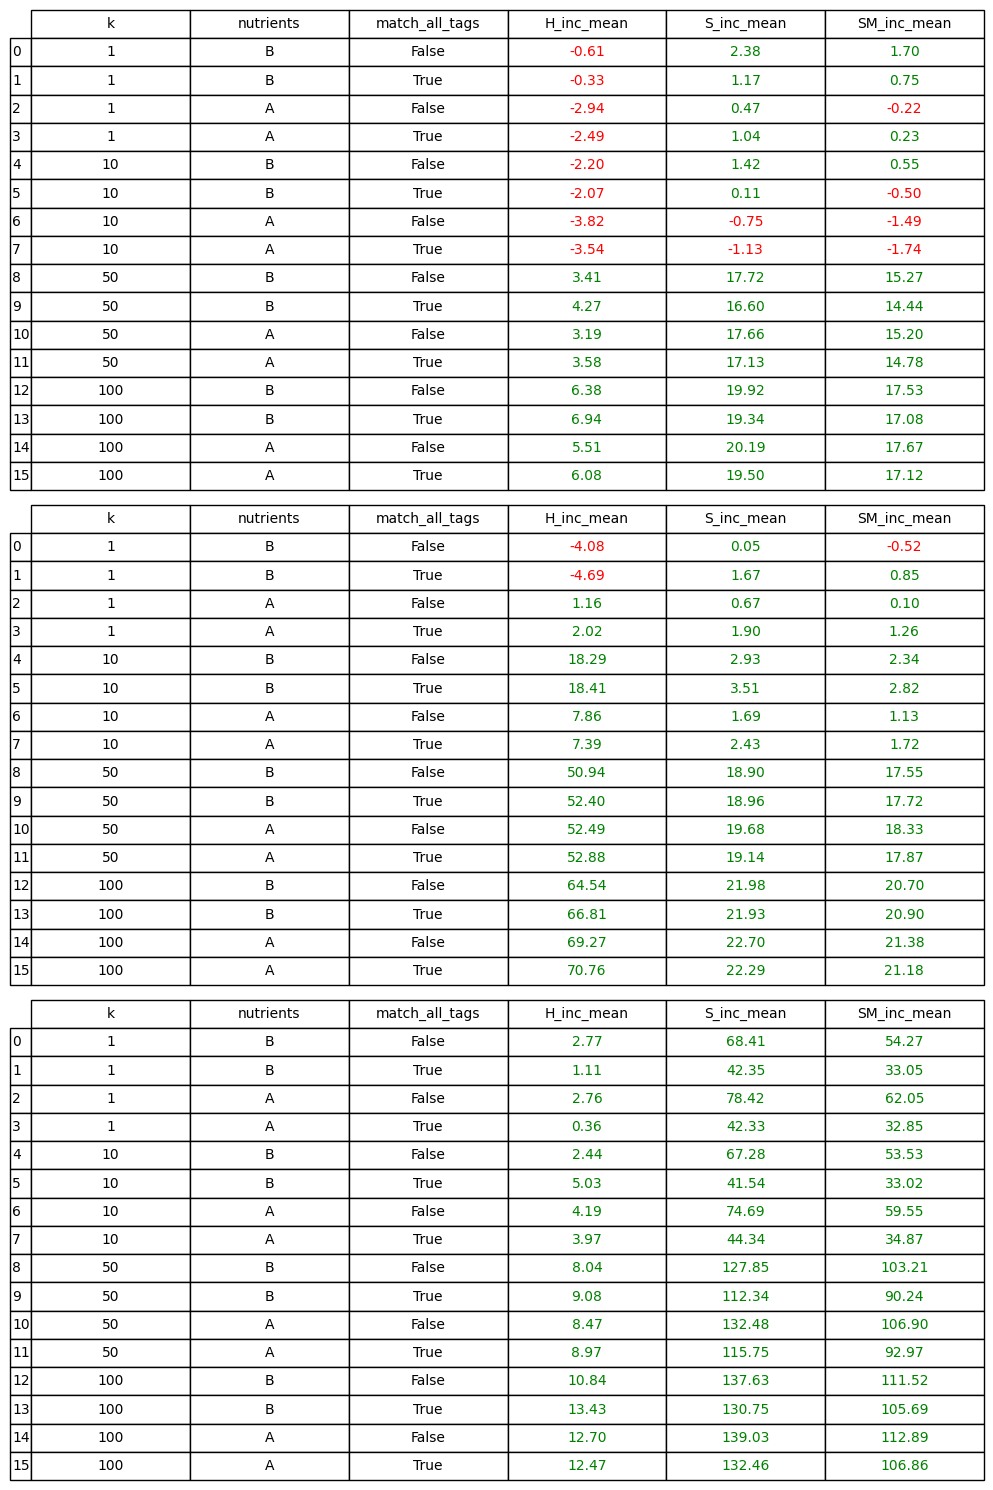

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assumiamo che medie_high_who_score, medie_sustainability_label_1 e medie_sustainability_label_2 siano i DataFrame


# Funzione per abbreviare i titoli delle colonne
def abbreviate_column_names(df):
    abbreviations = {'healthiness_increment_mean': 'H_inc_mean',
                     'sustainability_increment_mean': 'S_inc_mean',
                     'sustainameal_score_increment_mean': 'SM_inc_mean'}
    return df.rename(columns=abbreviations)

# Applica l'abbreviazione ai nomi delle colonne per ogni DataFrame
medie_high_who_score = abbreviate_column_names(medie_high_who_score)
medie_sustainability_label_1 = abbreviate_column_names(medie_sustainability_label_1)
medie_sustainability_label_2 = abbreviate_column_names(medie_sustainability_label_2)

nutrients_A = ['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
nutrients_B = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

# Funzione per sostituire la stringa dei nutrienti con 'A' o 'B'
def replace_nutrients(nutrient_string):
    if nutrient_string == ', '.join(nutrients_A):
        return 'A'
    elif nutrient_string == ', '.join(nutrients_B):
        return 'B'
    else:
        return 'Unknown'

# Applicazione della funzione di sostituzione ai DataFrame
medie_high_who_score['nutrients'] = medie_high_who_score['nutrients'].apply(replace_nutrients)
medie_sustainability_label_1['nutrients'] = medie_sustainability_label_1['nutrients'].apply(replace_nutrients)
medie_sustainability_label_2['nutrients'] = medie_sustainability_label_2['nutrients'].apply(replace_nutrients)

# Funzione per colorare i valori in base al segno
def color_negative_red_positive_green(value):
    if value < 0:
        return 'red'
    elif value > 0:
        return 'green'
    else:
        return 'black'

# Funzione per colorare i valori in base al segno e arrotondare i numeri
def apply_formatting(tbl, df):
    for (i, j), cell in tbl.get_celld().items():
        if j < 2 or i == 0:  # Salta le prime due colonne e l'intestazione
            continue
        val = cell.get_text().get_text()
        try:
            num = float(val)
            cell.get_text().set_text(f'{num:.2f}')
            cell.get_text().set_color('green' if num > 0 else 'red' if num < 0 else 'black')
        except ValueError:
            pass  # Non è un numero, non fare nulla

# Crea una figura per contenere le tabelle
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Disegna le tabelle su ogni subplot e applica la formattazione
for ax, df in zip(axs.flat, [medie_high_who_score, medie_sustainability_label_1, medie_sustainability_label_2]):
    ax.axis('off')
    tbl = table(ax, df, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.2, 1.2)
    apply_formatting(tbl, df)  # Applica il colore e l'arrotondamento qui

plt.tight_layout()
plt.show()



In [ ]:
# Salviamo i tre subset in file JSON
high_who_score_recipes.to_json('high_who_score_recipes.json', orient='records')
sustainability_label_1_recipes.to_json('sustainability_label_1_recipes.json', orient='records')
sustainability_label_2_recipes.to_json('sustainability_label_2_recipes.json', orient='records')